# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
name_data = []
cloudiness_data = []
country_data = []
humidity_data = []
lat_data = []
lon_data = []
maxtemp_data = []
windspeed_data = []
for i, city in enumerate(cities):
    request_url =  url + "&q=" + city
    try:
         weather_response = requests.get(request_url).json()
         name_data.append(weather_response['name'])
         cloudiness_data.append(weather_response['clouds']['all'])
         country_data.append(weather_response['sys']['country'])
         humidity_data.append(weather_response['main']['humidity'])
         lat_data.append(weather_response['coord']['lat'])
         lon_data.append(weather_response['coord']['lon'])
         maxtemp_data.append(weather_response['main']['temp_max'])
         windspeed_data.append(weather_response['wind']['speed'])
         time.sleep(1.01)
    except Exception as e:
        print("Data not found", e)

Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not found 'name'
Data not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
latlon_data = pd.DataFrame (
    {"City": name_data, 
    "Cloudiness": cloudiness_data,
    "Country": country_data,
    "Humidity": humidity_data,
    "Latitude": lat_data,
    "Longitude": lon_data,
    "Max Temp": maxtemp_data,
    "Windspeed": windspeed_data  
    })

latlon_data.to_csv("weather.csv")


latlon_data.head()


,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Windspeed
0,Mataura,99,NZ,95,-46.19,168.86,46.99,1.61
1,Bredasdorp,57,ZA,50,-34.53,20.04,77.00,6.93
2,Ancud,75,CL,82,-41.87,-73.82,57.20,13.87
3,Jamestown,1,US,64,42.10,-79.24,44.60,14.99
4,Bahía Solano,48,CO,81,6.23,-77.40,80.19,2.77


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

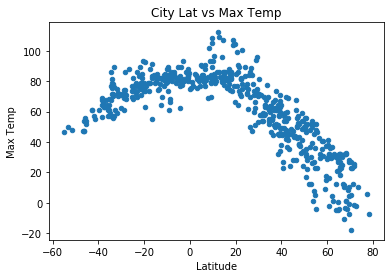

In [13]:
latlon_data.plot(kind='scatter',x='Latitude',y='Max Temp',title='City Lat vs Max Temp')
plt.savefig("output/Fig1.png")


#### Latitude vs. Humidity Plot

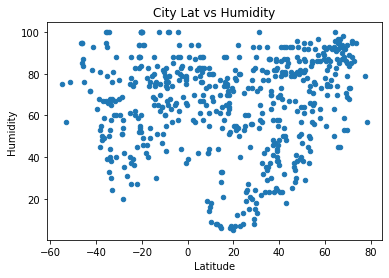

In [15]:
latlon_data.plot(kind='scatter',x='Latitude',y='Humidity',title='City Lat vs Humidity')
plt.savefig("output/Fig2.png")

#### Latitude vs. Cloudiness Plot

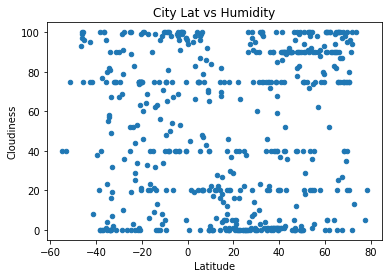

In [16]:
latlon_data.plot(kind='scatter',x='Latitude',y='Cloudiness',title='City Lat vs Humidity')
plt.savefig("output/Fig3.png")

#### Latitude vs. Wind Speed Plot

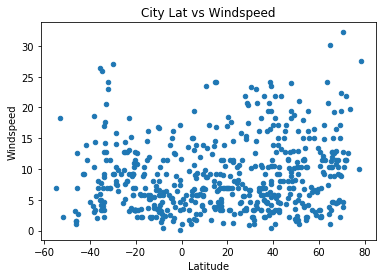

In [17]:
latlon_data.plot(kind='scatter',x='Latitude',y='Windspeed',title='City Lat vs Windspeed')
plt.savefig("output/Fig4.png")

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
#northern_df = latlon_data.groupby(['Latitude'])
northern_df = latlon_data.loc[latlon_data['Latitude'] >= 0]
southern_df = latlon_data.loc[latlon_data['Latitude'] <= 0]
#southern_df.head()
#northern_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

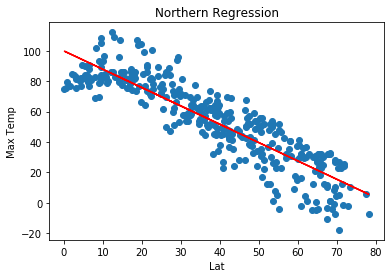

r = -0.8893145801893076


<Figure size 432x288 with 0 Axes>

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_df['Latitude'],northern_df['Max Temp'])
northern_regress_values = northern_df['Latitude'] * slope + intercept
plt.scatter(northern_df['Latitude'],northern_df['Max Temp'])
plt.plot(northern_df['Latitude'],northern_regress_values, "r-")
plt.title("Northern Regression")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("output/Fig5.png")
print (f"r = {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

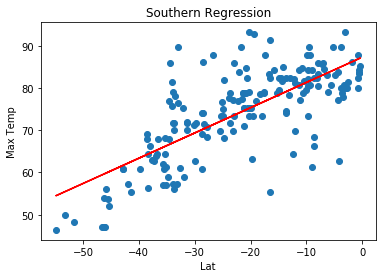

r = 0.7330966383438039


<Figure size 432x288 with 0 Axes>

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_df['Latitude'],southern_df['Max Temp'])
southern_regress_values = southern_df['Latitude'] * slope + intercept
plt.scatter(southern_df['Latitude'],southern_df['Max Temp'])
plt.plot(southern_df['Latitude'],southern_regress_values, "r-")
plt.title("Southern Regression")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("output/Fig5.png")
print (f"r = {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

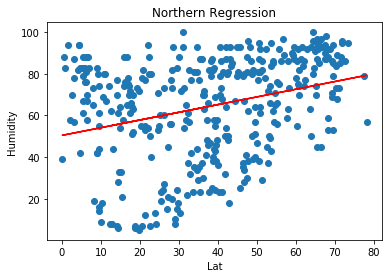

r = 0.3037248758491349


<Figure size 432x288 with 0 Axes>

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_df['Latitude'],northern_df['Humidity'])
northern_regress_values = northern_df['Latitude'] * slope + intercept
plt.scatter(northern_df['Latitude'],northern_df['Humidity'])
plt.plot(northern_df['Latitude'],northern_regress_values, "r-")
plt.title("Northern Regression")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output/Fig6.png")
print (f"r = {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

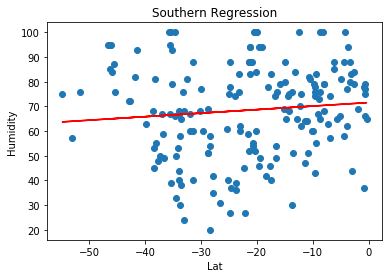

r = 0.09697594597973662


<Figure size 432x288 with 0 Axes>

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_df['Latitude'],southern_df['Humidity'])
southern_regress_values = southern_df['Latitude'] * slope + intercept
plt.scatter(southern_df['Latitude'],southern_df['Humidity'])
plt.plot(southern_df['Latitude'],southern_regress_values, "r-")
plt.title("Southern Regression")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output/Fig7.png")
print (f"r = {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

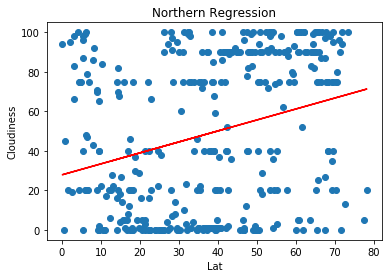

r = 0.2894527258970824


<Figure size 432x288 with 0 Axes>

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_df['Latitude'],northern_df['Cloudiness'])
northern_regress_values = northern_df['Latitude'] * slope + intercept
plt.scatter(northern_df['Latitude'],northern_df['Cloudiness'])
plt.plot(northern_df['Latitude'],northern_regress_values, "r-")
plt.title("Northern Regression")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output/Fig8.png")
print (f"r = {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

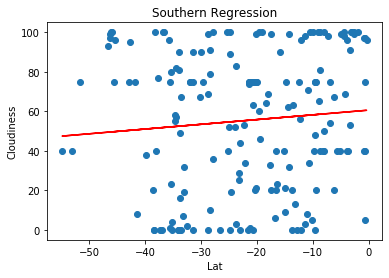

r = 0.08873548707385635


<Figure size 432x288 with 0 Axes>

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_df['Latitude'],southern_df['Cloudiness'])
southern_regress_values = southern_df['Latitude'] * slope + intercept
plt.scatter(southern_df['Latitude'],southern_df['Cloudiness'])
plt.plot(southern_df['Latitude'],southern_regress_values, "r-")
plt.title("Southern Regression")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output/Fig9.png")
print (f"r = {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

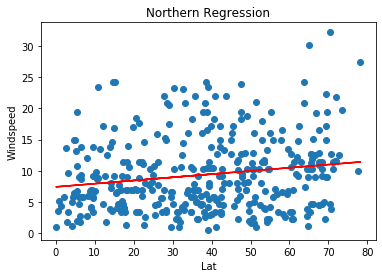

r = 0.1729182585895148


<Figure size 432x288 with 0 Axes>

In [38]:
#Windspeed
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_df['Latitude'],northern_df['Windspeed'])
northern_regress_values = northern_df['Latitude'] * slope + intercept
plt.scatter(northern_df['Latitude'],northern_df['Windspeed'])
plt.plot(northern_df['Latitude'],northern_regress_values, "r-")
plt.title("Northern Regression")
plt.xlabel('Lat')
plt.ylabel('Windspeed')
plt.show()
plt.savefig("output/Fig10.png")
print (f"r = {rvalue}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

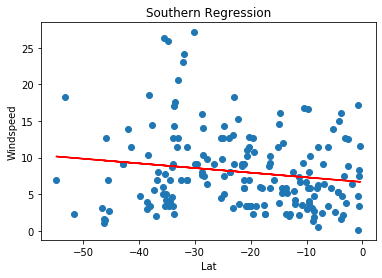

r = -0.15679390252936204


<Figure size 432x288 with 0 Axes>

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_df['Latitude'],southern_df['Windspeed'])
southern_regress_values = southern_df['Latitude'] * slope + intercept
plt.scatter(southern_df['Latitude'],southern_df['Windspeed'])
plt.plot(southern_df['Latitude'],southern_regress_values, "r-")
plt.title("Southern Regression")
plt.xlabel('Lat')
plt.ylabel('Windspeed')
plt.show()
plt.savefig("output/Fig11.png")
print (f"r = {rvalue}")